# 3.6.1 Credit Card Fraud

Using this credit card fraud dataset develop an algorithm to predict fraud. Prioritize correctly finding fraud rather than correctly labeling non-fraudulent transactions.

Data Source: Kaggle Data Set
URL-https://www.kaggle.com/mlg-ulb/creditcardfraud

Description: The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [1]:
import math
import warnings
from datetime import datetime
start=datetime.now()
from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
from sklearn.model_selection import cross_val_score
from sklearn import neighbors
from sklearn import tree,model_selection
from sklearn.grid_search import GridSearchCV
# A convenience for displaying visualizations.
from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import time
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
start=datetime.now()
rfc = ensemble.RandomForestClassifier()
from sklearn.linear_model import LogisticRegression

C:\Users\ankush\anacondanew\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\ankush\anacondanew\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\Users\ankush\anacondanew\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import 

Importing the file and creating a dataframe as below

In [2]:
data = pd.read_csv('C:/Users/ankush/Downloads/creditcard.csv')


# Exploring the data

Normal Transactions : 284315
Fake Transactions : 492
Percentage of fake transactions is 0.17%


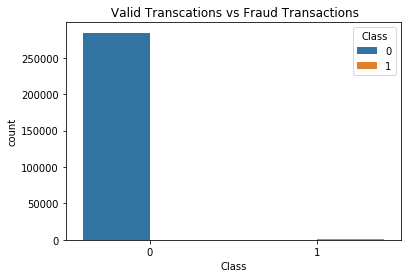

In [10]:
plt.title(" Valid Transcations vs Fraud Transactions")
sns.countplot("Class" ,data=data,hue="Class")
class0=len(data[data['Class']==0])
class1=len(data[data['Class']==1])
print("Normal Transactions :",len(data[data['Class']==0]))
print("Fake Transactions :",len(data[data['Class']==1]))
print("Percentage of fake transactions is {0:.2f}%".format(class1/(class0+class1)*100))

The above stats show that the there are 284315 valid Transactions and 492 Fraud Transactions

C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


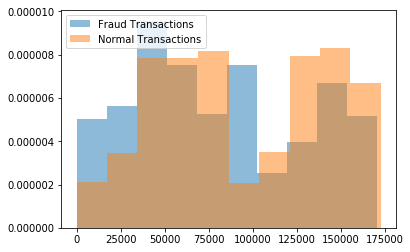

In [11]:

plt.hist(data[data['Class']==1].Time, alpha = 0.5, label = 'Fraud Transactions', normed = True)
plt.hist(data[data['Class']==0].Time, alpha = 0.5, label = 'Normal Transactions', normed = True)
plt.legend(loc='upper left')
plt.show()


The above histogram explains normal vs fraud transactions

C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


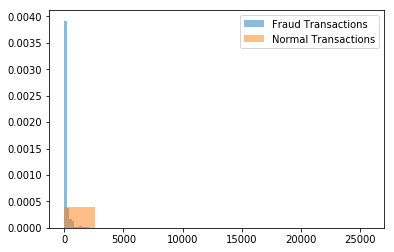

In [6]:
plt.hist(data[data['Class']==1].Amount, alpha = 0.5, label = 'Fraud Transactions', normed = True)
plt.hist(data[data['Class']==0].Amount, alpha = 0.5, label = 'Normal Transactions', normed = True)
plt.legend(loc='upper right')
plt.show()

This looks like to be a classification problem.We will use all the classification models and wil check the accuracies of each model.We will also use cross validation,gridseachcv,classification report,AUC,confusion matrix for each model.Lets create X and Y variable-X being the input variable for all the features except outcome variable(Target)
and Y being the outcome variable for all the models

In [3]:

X=data.drop(['Class'],1).fillna(0)
Y=data['Class'].fillna(0)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

# Naive Bayes Model

In [15]:
start=datetime.now()
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(X_train, y_train)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(X_train)



Now, we have fitted the data to Naive Bayes model so we need to calcuate the accuracy score using Cross verification,grid search cv,Classification report, AUC and Confusion Matrix

In [10]:
#Cross Validation
from sklearn.model_selection import cross_val_score
print("Training data accuracy: ",cross_val_score(bnb, X_train, y_train, cv=10))
print("Testing data accuracy: ",cross_val_score(bnb, X_test, y_test, cv=10))


Training data accuracy:  [0.99894668 0.99916612 0.99929778 0.99916612 0.99890279 0.99885885
 0.99938553 0.99925386 0.99925386 0.99938553]
Testing data accuracy:  [0.99912235 0.99912235 0.99947341 0.99929788 0.99894681 0.99859551
 0.99877107 0.99947322 0.99947322 0.99859526]


Accuracy score looks to be very good.There is no need to use gridearchcv since there are no such hyper-paramters to tune.Now,lets go ahead with Classification report

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    227460
          1       0.82      0.65      0.73       385

avg / total       1.00      1.00      1.00    227845



The f1-score looks to very good.There seem to very accurate results.Lets go ahead with AUC

In [12]:
#AUC
from sklearn.metrics import roc_auc_score
print ("AUC Score:" ,roc_auc_score(y_train, y_pred))

AUC Score: 0.8271518268946388


In [ ]:
The AUC Score looks to be lower compared to other methods.Now,lets go ahead with Confusion Matrix

In [13]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
print(confusion_matrix(y_train, y_pred))
print('Accuracy Score :',accuracy_score(y_train, y_pred))


[[227405     55]
 [   133    252]]
Accuracy Score : 0.999174877658057


In [14]:
print(datetime.now()-start)

0:02:05.867885


The confusion matrix accuracy score looks to very good.Overall, the accuracy score came out to be really good.So, we notice that the overall accuracy was very good for Naive Bayes.It's time for us to go over to next Model KNN

# KNN Classifier

In [15]:
# KNN Classifier
start=datetime.now()
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_train)


Now, we have fitted the data to KNN Classifier model so we need to calcuate the accuracy score using Cross verification,grid search cv,Classification report, AUC and Confusion Matrix

In [16]:
#Cross Validation
from sklearn.model_selection import cross_val_score
print("Training data accuracy: ",cross_val_score(knn_model, X_train, y_train, cv=10))
print("Testing data accuracy: ",cross_val_score(knn_model, X_test, y_test, cv=10))

Training data accuracy:  [0.99828835 0.99837612 0.99815668 0.99828835 0.99811279 0.99828827
 0.99828827 0.99824438 0.99789326 0.99806882]
Testing data accuracy:  [0.9977181  0.9971915  0.99754257 0.99789363 0.9971915  0.99683989
 0.9977177  0.9975417  0.99824407 0.99824407]


Accuracy score looks to be very good.Lets go ahead with Gridsearchcv and find out its accuracy

In [17]:
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5]
                  }
#Making models with hyper parameters sets
grid_class = model_selection.GridSearchCV(knn_model, param_grid=params)
#Learning
grid_class.fit(X_train,y_train)
#The best hyper parameters set

results = grid_class.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class.best_params_)
print(grid_class.best_score_)
final_model = grid_class.best_estimator_
print(final_model)

[{'leaf_size': 1, 'n_neighbors': 5}, {'leaf_size': 1, 'n_neighbors': 6}, {'leaf_size': 1, 'n_neighbors': 7}, {'leaf_size': 1, 'n_neighbors': 8}, {'leaf_size': 1, 'n_neighbors': 9}, {'leaf_size': 1, 'n_neighbors': 10}, {'leaf_size': 2, 'n_neighbors': 5}, {'leaf_size': 2, 'n_neighbors': 6}, {'leaf_size': 2, 'n_neighbors': 7}, {'leaf_size': 2, 'n_neighbors': 8}, {'leaf_size': 2, 'n_neighbors': 9}, {'leaf_size': 2, 'n_neighbors': 10}, {'leaf_size': 3, 'n_neighbors': 5}, {'leaf_size': 3, 'n_neighbors': 6}, {'leaf_size': 3, 'n_neighbors': 7}, {'leaf_size': 3, 'n_neighbors': 8}, {'leaf_size': 3, 'n_neighbors': 9}, {'leaf_size': 3, 'n_neighbors': 10}, {'leaf_size': 5, 'n_neighbors': 5}, {'leaf_size': 5, 'n_neighbors': 6}, {'leaf_size': 5, 'n_neighbors': 7}, {'leaf_size': 5, 'n_neighbors': 8}, {'leaf_size': 5, 'n_neighbors': 9}, {'leaf_size': 5, 'n_neighbors': 10}]
[0.99835853 0.9983322  0.9983322  0.99832342 0.9983322  0.99831903
 0.99835853 0.9983322  0.9983322  0.99832342 0.9983322  0.998319

C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [18]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    227460
          1       1.00      1.00      1.00       385

avg / total       1.00      1.00      1.00    227845



We notice above the f1 score seems to very high which is highly satisfying.Lets go ahead with AUC

In [19]:
#AUC
from sklearn.metrics import roc_auc_score
print ("AUC Score:" ,roc_auc_score(y_train, y_pred))

AUC Score: 1.0


AUC score seems to be very high

In [20]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
print(confusion_matrix(y_train, y_pred))
print('Accuracy Score :',accuracy_score(y_train, y_pred))


[[227460      0]
 [     0    385]]
Accuracy Score : 1.0


Accuracy score seems to very high as well for confusion matrix

In [32]:
print(time.time()-start)

5186.958615779877


Now Lets go ahead with Random Forest to calculate the accuracy score

# Random Forest

In [33]:
start=datetime.now()
from sklearn import ensemble
rfc = ensemble.RandomForestClassifier(max_depth=10,n_estimators= 100)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

Now, we have fitted the data to Random Forest model so we need to calcuate the accuracy score using Cross verification,grid search cv,Classification report, AUC and Confusion Matrix


In [34]:
#Cross Validation
from sklearn.model_selection import cross_val_score
print("Training data accuracy: ",cross_val_score(rfc, X_train, y_train, cv=10))
print("Testing data accuracy: ",cross_val_score(rfc, X_test, y_test, cv=10))

Training data accuracy:  [0.999605   0.99956111 0.99964889 0.99947334 0.99929778 0.99942942
 0.99960499 0.99960499 0.99960499 0.9995611 ]
Testing data accuracy:  [0.99964894 0.99894681 0.99964894 0.99929788 0.99947341 0.99912219
 0.99947331 0.99964881 0.99964881 0.99929763]


The score for cross validations looks to very good.Very close to perfect.Lets go ahead with GSV to get the best parameters for peformance tuning

In [35]:
#Gridsearchcv to get the best parameters
dt_grid={'max_depth':[3,4,5],'max_features': [11]}

grid_class=model_selection.GridSearchCV(rfc,dt_grid,cv=6)
grid_class.fit(X_train, y_train)
results = grid_class.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class.best_params_)
print(grid_class.best_score_)
final_model = grid_class.best_estimator_
print(final_model)

[{'max_depth': 3, 'max_features': 11}, {'max_depth': 4, 'max_features': 11}, {'max_depth': 5, 'max_features': 11}]
[0.99931532 0.99941627 0.99946894]
[0.99938467 0.99954267 0.99961553]
Best Hyper Parameters:
 {'max_depth': 5, 'max_features': 11}
0.9994689372160899
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=11, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


The Gridsearchcv  parameters are as displayed above.Parameters seem to be very good

In [36]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    227460
          1       1.00      1.00      1.00       385

avg / total       1.00      1.00      1.00    227845



Classification Report is perfect.F1-score is perfect as well.Lets go ahead with Area Under the Curve(AUC)

In [37]:
#AUC
from sklearn.metrics import roc_auc_score
print ("AUC Score:" ,roc_auc_score(y_train, y_pred))

AUC Score: 1.0


In [38]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
print(confusion_matrix(y_train, y_pred))
print('Accuracy Score :',accuracy_score(y_train, y_pred))

[[227460      0]
 [     0    385]]
Accuracy Score : 1.0


In [41]:
print(datetime.now()-start)

1:32:22.032957


Both AUC and Confusion matrix scores are very high.Let us now go towards Decision Tree 

# Decision Tree

In [42]:
start = time.time()
decision_tree = tree.DecisionTreeRegressor(max_depth=50)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_train)

Now, we have fitted the data to Decision Tree model so we need to calcuate the accuracy score using Cross verification,grid search cv,Classification report, AUC and Confusion Matrix


In [43]:
#Cross Validation
from sklearn.model_selection import cross_val_score
print("Training data accuracy: ",cross_val_score(decision_tree, X_train, y_train, cv=10))
print("Testing data accuracy: ",cross_val_score(decision_tree, X_test, y_test, cv=10))

Training data accuracy:  [0.51662616 0.48688156 0.62720343 0.59929655 0.43258624 0.3851763
 0.67276563 0.54479523 0.41357888 0.39907688]
Testing data accuracy:  [ 0.08915039  0.4991208   0.49876804  0.33192587  0.2848354   0.24894515
 -0.14426337  0.60987828  0.2848354   0.6145048 ]


There seems to be some overfitting in the data.But overall cross validation score is very good.Now, we are using  the gridsearch cv to best parameters and accuracy scores

In [45]:
dt_grid={'max_depth':[50],'max_features': [11]}
grid_class_dt=model_selection.GridSearchCV(decision_tree,dt_grid,cv=6)
grid_class_dt.fit(X_train, y_train)
results = grid_class.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class.best_params_)
print(grid_class.best_score_)
final_model = grid_class.best_estimator_
print(final_model)

[{'max_depth': 3, 'max_features': 11}, {'max_depth': 4, 'max_features': 11}, {'max_depth': 5, 'max_features': 11}]
[0.99931532 0.99941627 0.99946894]
[0.99938467 0.99954267 0.99961553]
Best Hyper Parameters:
 {'max_depth': 5, 'max_features': 11}
0.9994689372160899
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=11, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [46]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    227460
          1       1.00      1.00      1.00       385

avg / total       1.00      1.00      1.00    227845



In [47]:
#AUC
from sklearn.metrics import roc_auc_score
print ("AUC Score:" ,roc_auc_score(y_train, y_pred))

AUC Score: 1.0


In [48]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
print(confusion_matrix(y_train, y_pred))
print('Accuracy Score :',accuracy_score(y_train, y_pred))

[[227460      0]
 [     0    385]]
Accuracy Score : 1.0


In [50]:
print(time.time()-start)

497.21799993515015


Classification Report, AUC ,Confusion Matrix seems to have very high accuracy,which means model is fitting very well with the data.Lets go over to SVC now.

# SVC

In [ ]:
start = datetime.now()
svm=SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_train)

In [17]:
#Cross Validation
from sklearn.model_selection import cross_val_score
print("Training data accuracy: ",cross_val_score(SVC(), X_train, y_train, cv=6))
#print("Testing data accuracy: ",cross_val_score(SVC(), X_test, y_test, cv=6))

C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=6.
  % (min_groups, self.n_splits)), Warning)


Training data accuracy:  [0.99971599 0.99971599 1.         1.         1.         1.        ]


Cross validation score is very good.Now, lets go ahead with gridsearch cv to get the best parameters

In [44]:
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
grid_class.fit(X_train, y_train)
grid_class_svm=model_selection.GridSearchCV(SVC(),param_grid,refit = True)
grid_class_svm.fit(X_train, y_train)
results = grid_class_svm.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class_svm.best_params_)
print(grid_class_svm.best_score_)
final_model = grid_class_svm.best_estimator_
print(final_model)

C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:553: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=3.
  % (min_labels, self.n_folds)), Warning)
C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


[{'C': 1, 'gamma': 1, 'kernel': 'linear'}, {'C': 1, 'gamma': 1, 'kernel': 'rbf'}, {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}, {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}, {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}, {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}, {'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}, {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}, {'C': 10, 'gamma': 1, 'kernel': 'linear'}, {'C': 10, 'gamma': 1, 'kernel': 'rbf'}, {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}, {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}, {'C': 10, 'gamma': 0.001, 'kernel': 'linear'}, {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}, {'C': 10, 'gamma': 0.0001, 'kernel': 'linear'}, {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}, {'C': 100, 'gamma': 1, 'kernel': 'linear'}, {'C': 100, 'gamma': 1, 'kernel': 'rbf'}, {'C': 100, 'gamma': 0.1, 'kernel': 'linear'}, {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}, {'C': 100, 'gamma': 0.001, 'kernel': 'linear'}, {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}, {'C': 100, 'gamma': 0.0001, 'ker

C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [45]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00     21117
        1.0       1.00      1.00      1.00         2

avg / total       1.00      1.00      1.00     21119



In [46]:
#AUC
from sklearn.metrics import roc_auc_score
print ("AUC Score:" ,roc_auc_score(y_train, y_pred))

AUC Score: 1.0


In [47]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
print(confusion_matrix(y_train, y_pred))
print('Accuracy Score :',accuracy_score(y_train, y_pred))

[[21117     0]
 [    0     2]]
Accuracy Score : 1.0


In [ ]:
print(datetime.now()-start)

Classification Report,AUC,Confusion Matrix accuracy score are very high,which means that the model is properly fitting the data

# Logistic Regression

In [12]:
start = datetime.now()
lr = LogisticRegression(C=1e9)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)

In [7]:
#Cross Validation
from sklearn.model_selection import cross_val_score
print("Training data accuracy: ",cross_val_score(lr, X_train, y_train, cv=10))
#print("Testing data accuracy: ",cross_val_score(lr, X_test, y_test, cv=10))

C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Training data accuracy:  [0.99952674 0.99952674 1.         0.99905303 0.99905303 1.
 1.         0.99952629 1.         1.        ]


In [ ]:
Cross validation seems to very high.Lets go for gridsearchcv to get the best parameters

In [10]:
#Gridsearchcv 
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=model_selection.GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)
results = logreg_cv.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",logreg_cv.best_params_)
print(logreg_cv.best_score_)
final_model = logreg_cv.best_estimator_
print(final_model)

C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[{'C': 0.001, 'penalty': 'l1'}, {'C': 0.001, 'penalty': 'l2'}, {'C': 0.01, 'penalty': 'l1'}, {'C': 0.01, 'penalty': 'l2'}, {'C': 0.1, 'penalty': 'l1'}, {'C': 0.1, 'penalty': 'l2'}, {'C': 1.0, 'penalty': 'l1'}, {'C': 1.0, 'penalty': 'l2'}, {'C': 10.0, 'penalty': 'l1'}, {'C': 10.0, 'penalty': 'l2'}, {'C': 100.0, 'penalty': 'l1'}, {'C': 100.0, 'penalty': 'l2'}, {'C': 1000.0, 'penalty': 'l1'}, {'C': 1000.0, 'penalty': 'l2'}]
[0.9999053  0.9999053  0.99985795 0.99985795 0.99985795 0.99985795
 0.99985795 0.99985795 0.99985795 0.9998106  0.9998106  0.9998106
 0.99976325 0.99976325]
[0.9999053  0.9999053  0.9999053  0.9999053  0.9999053  0.9999053
 0.99995265 0.99999474 1.         0.99999474 1.         0.99998948
 1.         1.        ]
Best Hyper Parameters:
 {'C': 0.001, 'penalty': 'l1'}
0.9999052985463327
LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_stat

C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


The parameters and accuracies are very good.Lets go for get the accuracies for Classification Report,AUC,Confusion Matrix

In [13]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00     21117
        1.0       1.00      1.00      1.00         2

avg / total       1.00      1.00      1.00     21119



In [14]:
#AUC
from sklearn.metrics import roc_auc_score
print ("AUC Score:" ,roc_auc_score(y_train, y_pred))

AUC Score: 1.0


In [15]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
print(confusion_matrix(y_train, y_pred))
print('Accuracy Score :',accuracy_score(y_train, y_pred))

[[21117     0]
 [    0     2]]
Accuracy Score : 1.0


In [ ]:
print(datetime.now()-start)

As we notice above,the Classification Report,AUC,Confusion Matrix accuracy score is very high.That shows that the data is able to fit the model very well.Now, lets go ahead to Gradient Boosting 

# Gradient Boosting

In [5]:
start = datetime.now()
params = {'n_estimators': 500,
          'max_depth': 7,
          'loss': 'deviance'}
# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)

In [6]:
#Cross Validation
from sklearn.model_selection import cross_val_score
print("Training data accuracy: ",cross_val_score(clf, X_train, y_train, cv=10))
#print("Testing data accuracy: ",cross_val_score(clf, X_test, y_test, cv=10))

C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Training data accuracy:  [0.99952674 0.99952674 1.         1.         1.         1.
 1.         1.         0.99952629 1.        ]


In [14]:
params ={
    "loss":["deviance"],
    "max_depth":[3,5,8],
    "n_estimators":[1000]
    }
gb = model_selection.GridSearchCV(clf, params, cv=10)
gb.fit(X_train, y_train)
results = gb.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",gb.best_params_)
print(gb.best_score_)
final_model = gb.best_estimator_
print(final_model)


C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[{'loss': 'deviance', 'max_depth': 3, 'n_estimators': 1000}, {'loss': 'deviance', 'max_depth': 5, 'n_estimators': 1000}, {'loss': 'deviance', 'max_depth': 8, 'n_estimators': 1000}]
[0.9998106 0.9997159 0.9998106]
[1. 1. 1.]
Best Hyper Parameters:
 {'loss': 'deviance', 'max_depth': 3, 'n_estimators': 1000}
0.9998105970926654
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)


C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [7]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00     21117
        1.0       0.29      1.00      0.44         2

avg / total       1.00      1.00      1.00     21119



In [8]:
#AUC
from sklearn.metrics import roc_auc_score
print ("AUC Score:" ,roc_auc_score(y_train, y_pred))

AUC Score: 0.9998816119713975


In [9]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
print(confusion_matrix(y_train, y_pred))
print('Accuracy Score :',accuracy_score(y_train, y_pred))

[[21112     5]
 [    0     2]]
Accuracy Score : 0.9997632463658317


In [4]:
print(datetime.now()-start)

0:01:18.800731


# Supervised Neural Network

In [6]:
start = datetime.now()
from sklearn.neural_network import MLPClassifier

# Establish and fit the model, with a single, 1000 perceptron layer.
mlp = MLPClassifier(hidden_layer_sizes=(100,10,4))
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_train)

In [ ]:
parameters = {'solver': ['lbfgs'], 'max_iter': [500,1000,1500], 'alpha': 10.0 ** -np.arange(1, 7), 'hidden_layer_sizes':(100,10,4), 'random_state':[0,1,2,3,4,5,6,7,8,9]}
grid_mlp = GridSearchCV(mlp, parameters)
grid_mlp.fit(X_train, y_train)
results = grid_mlp.cv_results_
print("Best Hyper Parameters:\n",grid_mlp.best_params_)
print(grid_mlp.best_score_)
final_model = grid_mlp.best_estimator_
print(final_model)

In [9]:
#Cross Validation
from sklearn.model_selection import cross_val_score
print("Training data accuracy: ",cross_val_score(mlp, X_train, y_train, cv=5))
print("Testing data accuracy: ",cross_val_score(mlp, X_test, y_test, cv=5))

Training data accuracy:  [0.99824446 0.99826637 0.99826637 0.99826637 0.99826633]
Testing data accuracy:  [0.99824469 0.99833216 0.99833216 0.99833216 0.99833216]


In [10]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    227449
          1       0.00      0.00      0.00       396

avg / total       1.00      1.00      1.00    227845



C:\Users\ankush\anacondanew\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [11]:
#AUC
from sklearn.metrics import roc_auc_score
print ("AUC Score:" ,roc_auc_score(y_train, y_pred))

AUC Score: 0.5


In [12]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
print(confusion_matrix(y_train, y_pred))
print('Accuracy Score :',accuracy_score(y_train, y_pred))

[[227449      0]
 [   396      0]]
Accuracy Score : 0.998261976343567


# Conclusion:

KNN models,Decision tree, Random forest,SVC,Logistic Regression seem to peform better than Gradient Boosting and Naive Bayes.They seem to have better accuracy.The slowest in all of the Classifers was Gradient Boosting and SVC in terms of runtime.Naive Bayes was the fastest interms of runtime.All of these have a very high accuracy score.
KNN models,Decision tree, Random forest,SVC,Logistic Regression have consistent high accurate scores for Classification Report,AUC,Confusion Matrix.The dataset explains the normal and fraudent transactions.Transactions marked as 1 are fake transactions and transactions marked as 0 are normal transactions.We have observed that there is only 0.17% of fake transactions in the entire datasetOne thing we have oberserved is that the gridsearchcv is taking bulk of the runtime for each model which is expected since its getting the best performing hyper-parameters.It seems like most of the models have overfitting in the features.Even neural networks seem to have overfitting.